<a href="https://colab.research.google.com/github/GurnoorArora/EDA-22BDS0020/blob/main/22BDS0020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

22BDS0020
Gurnoor Arora

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url='https://raw.githubusercontent.com/salemprakash/EDA/main/Data/GSS7402.csv'
df=pd.read_csv(url)
df

,rownames,kids,age,education,year,siblings,agefirstbirth,ethnicity,city16,lowincome16,immigrant
0,1,0,25,14,2002,1,NaN,cauc,no,no,no
1,2,1,30,13,2002,4,19.0,cauc,yes,no,no
2,3,1,55,2,2002,1,27.0,cauc,no,no,yes
3,4,2,57,16,2002,1,22.0,cauc,no,no,no
4,5,2,71,12,2002,6,29.0,cauc,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...
9115,9116,3,30,12,1998,2,21.0,cauc,no,no,no
9116,9117,2,37,12,1998,3,23.0,cauc,no,no,no
9117,9118,3,59,9,1998,5,20.0,cauc,no,no,no
9118,9119,2,73,14,1998,5,22.0,cauc,yes,no,no


In [ ]:
#Initial Data Exploration

#Checking Dimensions
rows=df.shape[0]
cols=df.shape[1]
print(f"The dataset has {rows} rows and {cols} columns")

#checking data type and info
df.info()

#preview of the data
df.head()

#summary statistics- mean median and sd etc for numerical data
df.describe()

#summary statistics for categorical data- this will include counts,unique values and the most requent categories
df.describe(include='object')



The dataset has 9120 rows and 11 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9120 entries, 0 to 9119
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rownames       9120 non-null   int64  
 1   kids           9120 non-null   int64  
 2   age            9120 non-null   int64  
 3   education      9120 non-null   int64  
 4   year           9120 non-null   int64  
 5   siblings       9120 non-null   int64  
 6   agefirstbirth  3312 non-null   float64
 7   ethnicity      9120 non-null   object 
 8   city16         9120 non-null   object 
 9   lowincome16    9120 non-null   object 
 10  immigrant      9120 non-null   object 
dtypes: float64(1), int64(6), object(4)
memory usage: 783.9+ KB


,ethnicity,city16,lowincome16,immigrant
count,9120,9120,9120,9120
unique,2,2,2,2
top,cauc,no,no,no
freq,7335,5246,7182,8122


**Handling Missing Values**

In [ ]:
print("Column wise missing values")
print(df.isnull().sum())

Column wise missing values
rownames            0
kids                0
age                 0
education           0
year                0
siblings            0
agefirstbirth    5808
ethnicity           0
city16              0
lowincome16         0
immigrant           0
dtype: int64


As we see there are 5808 missing values in agefirstbirth

In [ ]:
# since the column agefirstbith has missing values this could mean, two things
#if a person had 0 kids then this field is meaningless for them
#if a person had more than 0 kids and this field is empty, this would mean the value is genuinely missing
print(df[df['agefirstbirth'].isnull()]['kids'].value_counts())


kids
0    2127
2    1164
1     787
3     730
4     442
5     235
6     145
8     110
7      68
Name: count, dtype: int64


This shows The people wih '0' kids have 2127 Nan values because its an invalid column for them but rest, 3681 values are genuinely missing

In [ ]:
#step-1
#Handling 2127 Nan values becuase the column is meaningless to them
# For people with 0 kids, fill NaN in 'agefirstbirth' with 0
df.loc[df['kids'] == 0, 'agefirstbirth'] = df.loc[df['kids'] == 0, 'agefirstbirth'].fillna(0)

#step-2
#Now I will handle the rest 3681 cases whose values are genuinely missing
# First, calculate the median age of first birth ONLY for parents
median_age = df[df['agefirstbirth'] > 0]['agefirstbirth'].median()

# Now, fill the remaining NaNs with this median value
df['agefirstbirth'] = df['agefirstbirth'].fillna(median_age)

print("Column wise missing values")
print(df.isnull().sum())

Column wise missing values
kids             0
age              0
education        0
year             0
siblings         0
agefirstbirth    0
ethnicity        0
city16           0
lowincome16      0
immigrant        0
has_children     0
dtype: int64


Missing Values Handled

***Handling Duplicate Data***

In [ ]:
rows_duplicate=df.duplicated().sum()
print(f"The dataset has {rows_duplicate} duplicate rows")

The dataset has 0 duplicate rows


***Data Cleaning and Preparation***

In [ ]:
# We will drop rownames as its uncessary
df.drop('rownames',axis=1,inplace=True)
df.head()

,kids,age,education,year,siblings,agefirstbirth,ethnicity,city16,lowincome16,immigrant
0,0,25,14,2002,1,NaN,cauc,no,no,no
1,1,30,13,2002,4,19.0,cauc,yes,no,no
2,1,55,2,2002,1,27.0,cauc,no,no,yes
3,2,57,16,2002,1,22.0,cauc,no,no,no
4,2,71,12,2002,6,29.0,cauc,yes,no,no


**Univariate Analysis(For Numerical columns)**

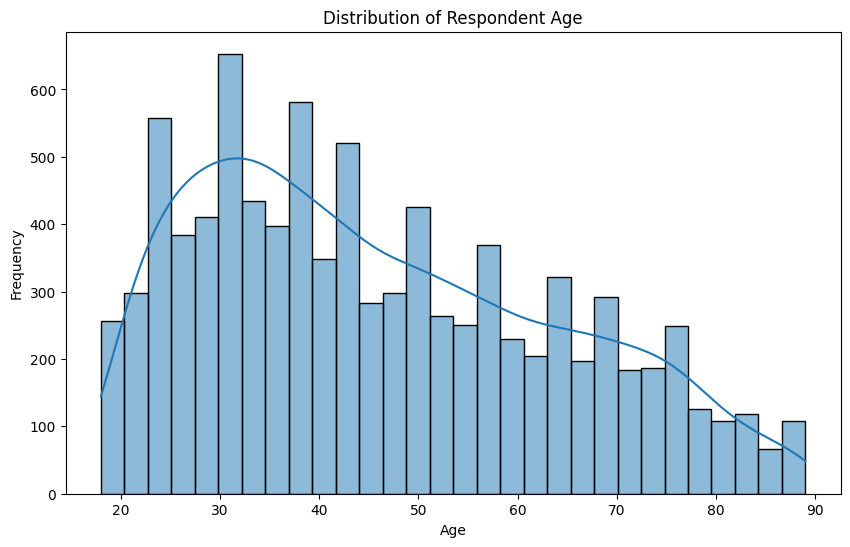

In [ ]:
#Plotting Histogram distribution of Respondent Age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', kde=True, bins=30)
plt.title('Distribution of Respondent Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#The goal here is to understand the distribution of age across all the respondents in our dataset

#Inference from the plot
#- The highest concentration of respondents is in their 30s as depicted by the peak of the KDE curve
#- The distribution is right skewed(+ve skewed), this means dataset contains more numbr of young and middle aged people


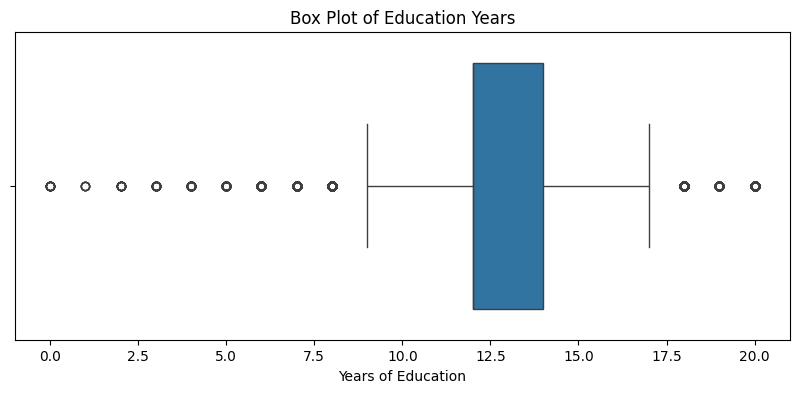

In [ ]:
#Plotting  Box plot for education
#which shows median,quartiles and potential outliers for years of education

plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x='education')
plt.title('Box Plot of Education Years')
plt.xlabel('Years of Education')
plt.show()

#Inference from the plot
#- Median:around 12 yo age, this means 50% of the data have 12 or fewer years of education
#- Q1 and Q3 is in between 12-14 years, this tells buld of the respondents have between 12 and 14 years of education
#- Threre are numerous outliers between 0 to 8 represting inidviduals with lesser than the majority education
#- There are numerous outliers between 18-20 representing individuals with more than majority educations

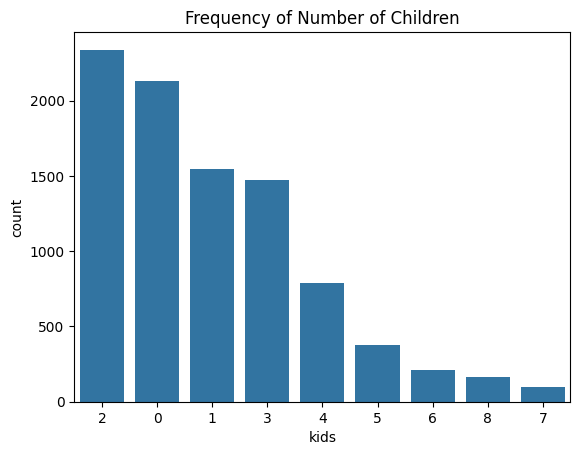

In [ ]:
#Count Plot for kids data
sns.countplot(data=df, x='kids', order = df['kids'].value_counts().index)
plt.title('Frequency of Number of Children')
plt.show()

#Inference from the plot
#1 Most common value:2
#2 Distribution shape- right skewed


***Univariate Analysis (For Categorical data)***

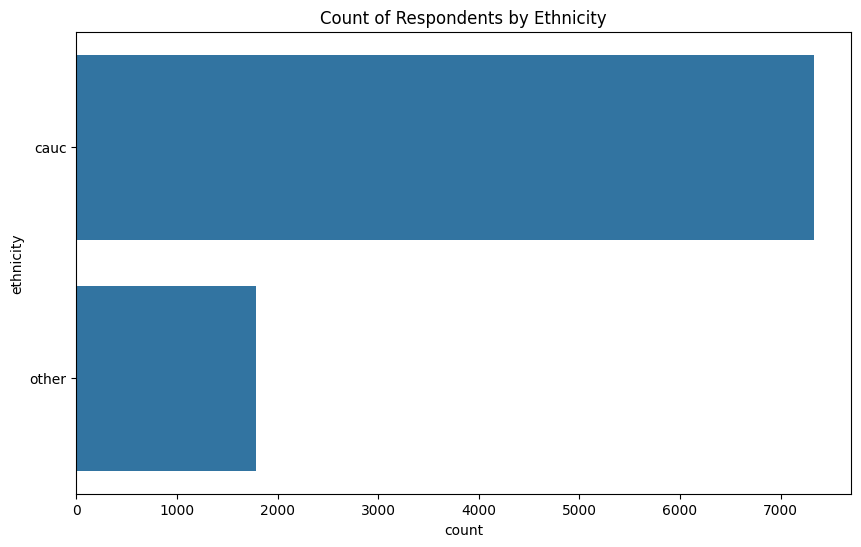

In [ ]:
#Plotting count plot for ethinicity
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='ethnicity', order=df['ethnicity'].value_counts().index)
plt.title('Count of Respondents by Ethnicity')
plt.show()

#Inference
#Shows  greater than 7000 cauc ethnicity
#Shows less than 2000 others

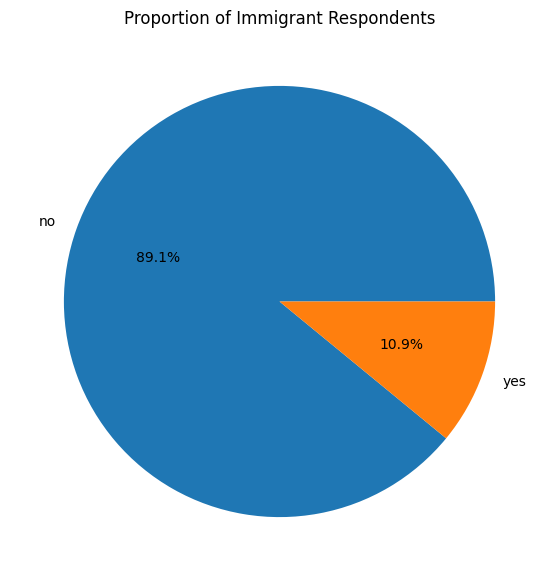

In [ ]:
#Pie chart for immigrant status proportions
plt.figure(figsize=(7, 7))
df['immigrant'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Immigrant Respondents')
plt.ylabel('')
plt.show()

**Bivariate Analysis (Numerical vs Numerical)**

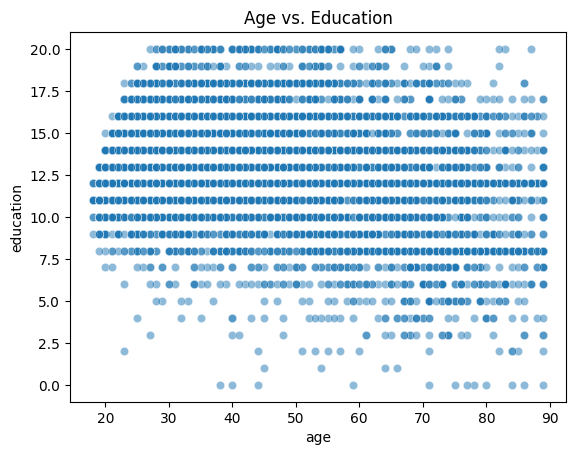

In [ ]:
# Scatter Plot to find relationships between two numerical variables(age and education)
sns.scatterplot(data=df, x='age', y='education', alpha=0.5) #
plt.title('Age vs. Education')
plt.show()

**Bivariate Analysis(Numerical vs Categorical)**

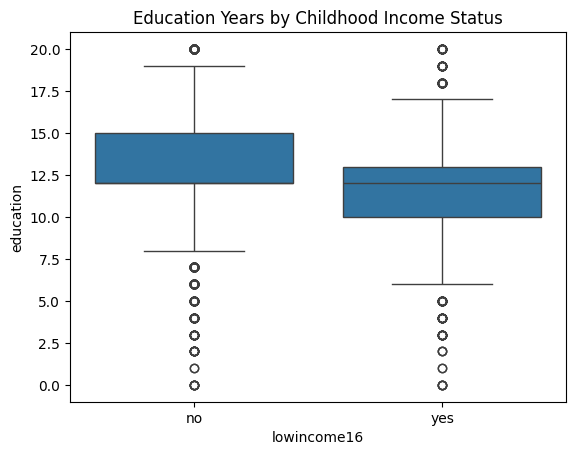

In [ ]:
# Box Plot to compare numerical distributions across categories
sns.boxplot(data=df, x='lowincome16', y='education')
plt.title('Education Years by Childhood Income Status')
plt.show()



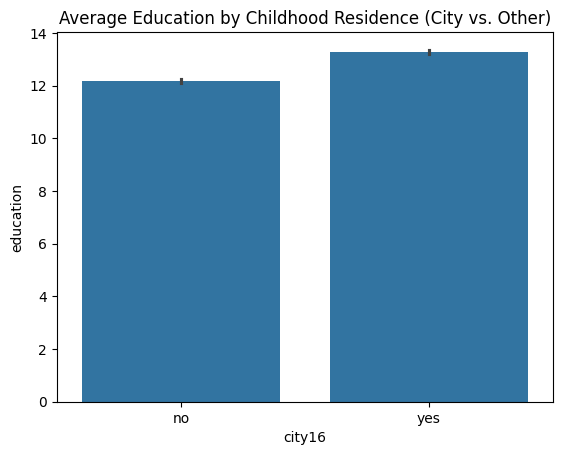

In [ ]:
# Bar Plot to compare the average of a numerical variable across categories
sns.barplot(data=df, x='city16', y='education')
plt.title('Average Education by Childhood Residence (City vs. Other)')
plt.show()

**Categorical vs Categorical**

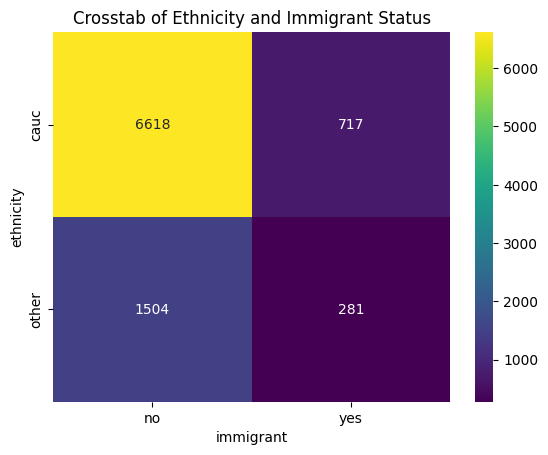

In [ ]:
# Heatmap of a Crosstab to see co-occurrence frequencies
crosstab = pd.crosstab(df['ethnicity'], df['immigrant'])
sns.heatmap(crosstab, annot=True, fmt='d', cmap='viridis')
plt.title('Crosstab of Ethnicity and Immigrant Status')
plt.show()

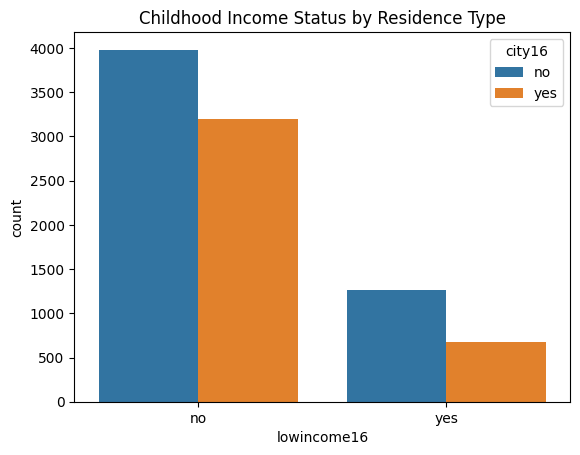

In [ ]:
# Grouped Count Plot for a more intuitive comparison
sns.countplot(data=df, x='lowincome16', hue='city16')
plt.title('Childhood Income Status by Residence Type')
plt.show()

**Multivariate analysis**

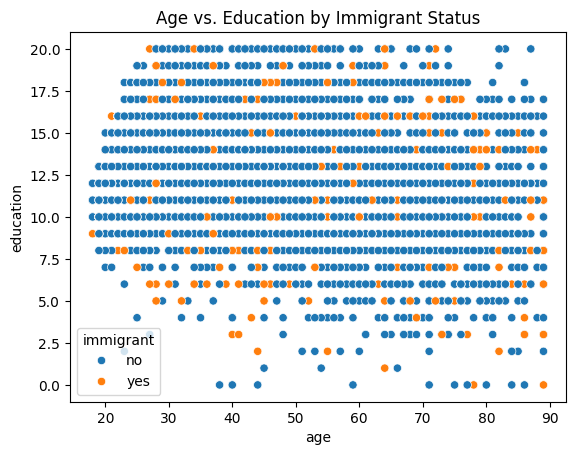

In [ ]:

# Scatter Plot with a third variable (hue)
sns.scatterplot(data=df, x='age', y='education', hue='immigrant')
plt.title('Age vs. Education by Immigrant Status')
plt.show()

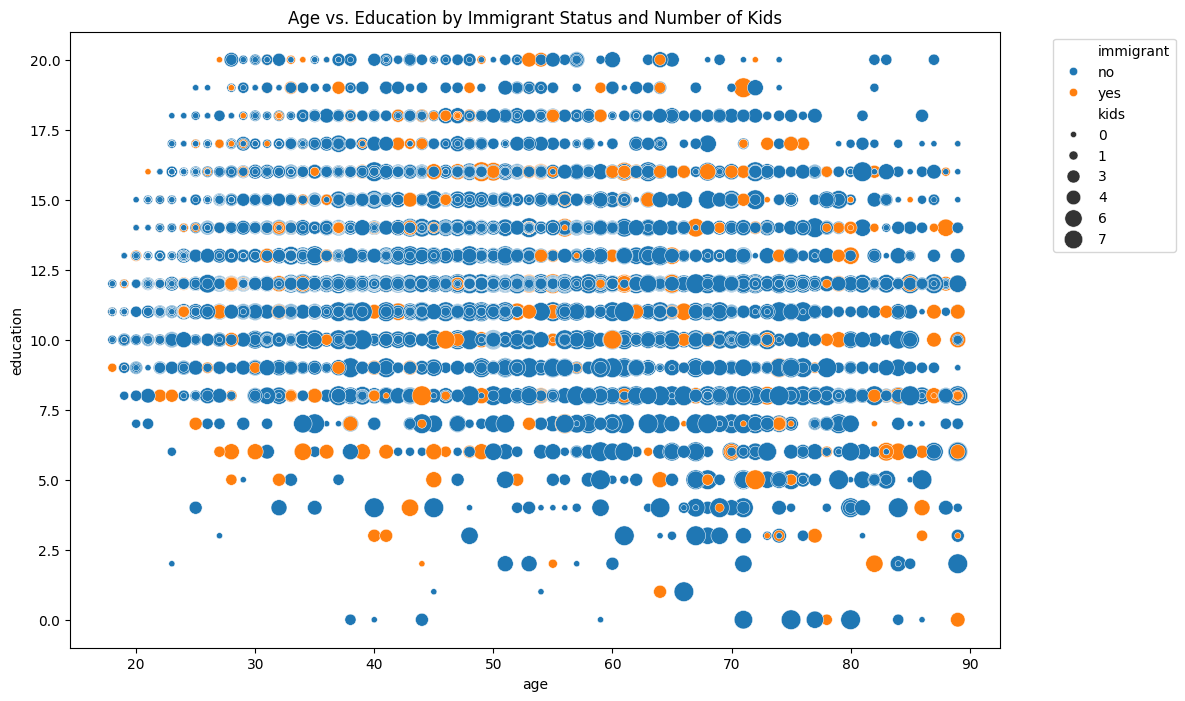

In [ ]:
# Scatter Plot with a fourth variable (size)
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='age', y='education', hue='immigrant', size='kids', sizes=(20, 200))
plt.title('Age vs. Education by Immigrant Status and Number of Kids')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Pair Plot **

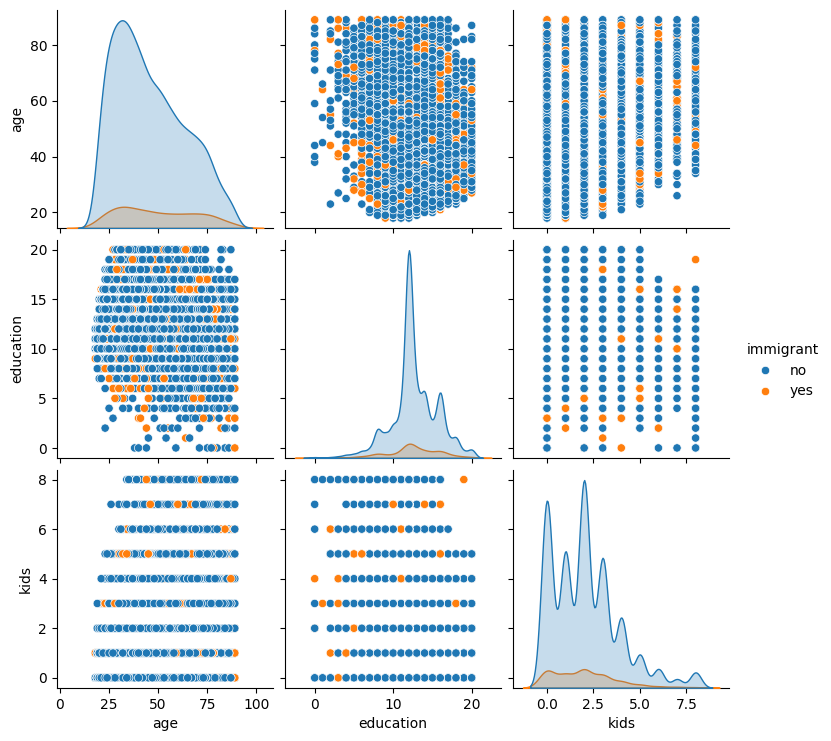

In [ ]:
# Pair Plot to see all pairwise relationships, colored by a category
sns.pairplot(df, vars=['age', 'education', 'kids'], hue='immigrant')
plt.show()



**Correlation heatmap**

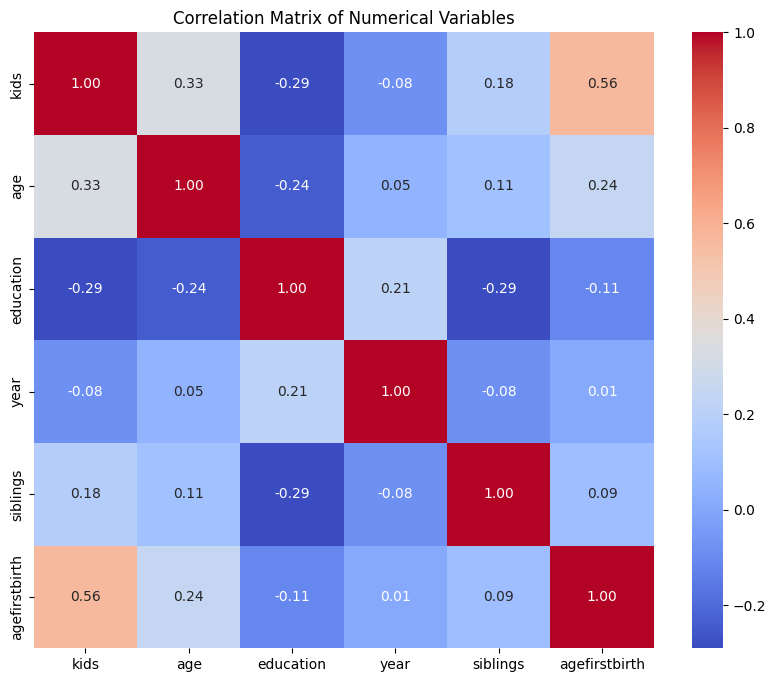

In [ ]:
# Correlation Heatmap for all numerical variables
numerical_cols = ['kids', 'age', 'education', 'year', 'siblings', 'agefirstbirth']
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

**Relational Plot(Facet Grid)**

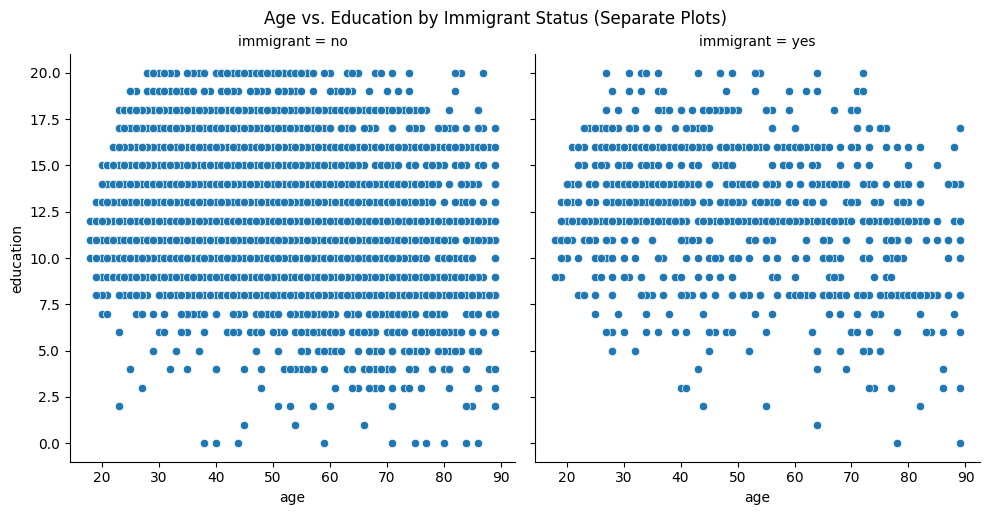

In [ ]:
# Relational Plot to create subplots for different categories
# This shows the age vs. education relationship separately for immigrants and non-immigrants
sns.relplot(data=df, x='age', y='education', col='immigrant')
plt.suptitle('Age vs. Education by Immigrant Status (Separate Plots)', y=1.02) # Add a main title
plt.show()

PHASE 2(SUBMISSION DATE-2 nd OCTOBER)   
Name- Gurnoor Arora
Reg no.-22BDS0020

**1D Analysis**

1. Measures of Central Tendency


In [ ]:
mean_age=df['age'].mean()